In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [6]:
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)
X = adult.data.features.copy()
X=X.copy()
y = adult.data.targets.copy()   

df = pd.concat([X, y], axis=1)
df.head()

ConnectionError: Error connecting to server

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.shape

(48842, 15)

In [ ]:
print(X.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64


In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])


In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())

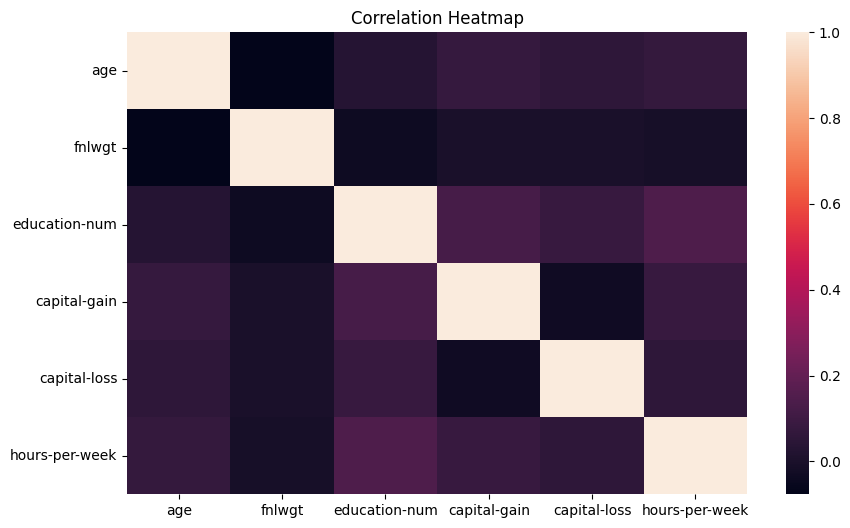

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(X[numerical_cols].corr(), annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
print(X.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


In [ ]:
import numpy as np

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = ((X[col] < lower_limit) | (X[col] > upper_limit)).sum()
    print(f"{col}: {outliers} outliers")


age: 216 outliers
fnlwgt: 1453 outliers
education-num: 1794 outliers
capital-gain: 4035 outliers
capital-loss: 2282 outliers
hours-per-week: 13496 outliers


In [ ]:
import numpy as np

for col in numerical_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    X[col] = np.where(X[col] > upper_limit, upper_limit,
                      np.where(X[col] < lower_limit, lower_limit, X[col]))
    


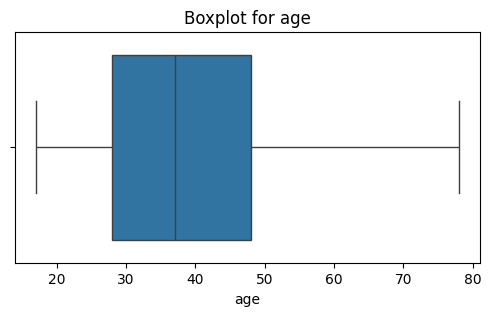

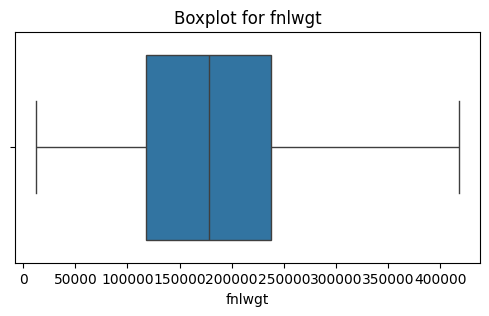

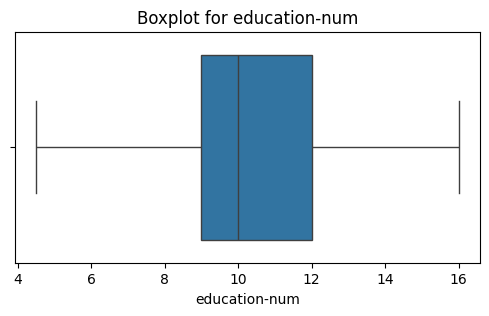

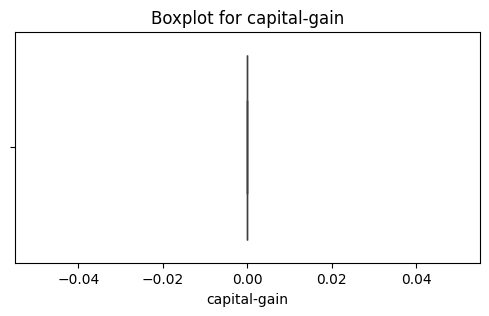

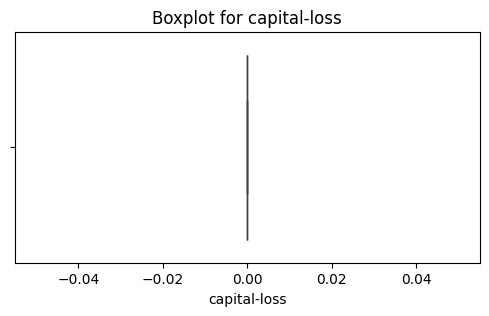

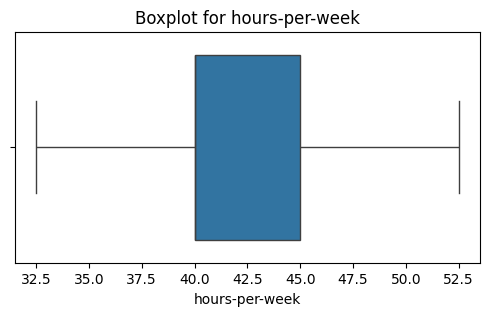

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=X[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [ ]:

y_series = y.iloc[:, 0]  


y_clean = y_series.str.strip().str.replace(".", "", regex=False)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_clean)

print(y_encoded[:10])


[0 0 0 0 0 0 0 1 1 1]


In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

knn = KNeighborsClassifier(n_neighbors=5, weights='distance') 
knn.fit(X_train_scaled, y_train)


knn_pred = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

KNN Accuracy: 0.8050977582147609


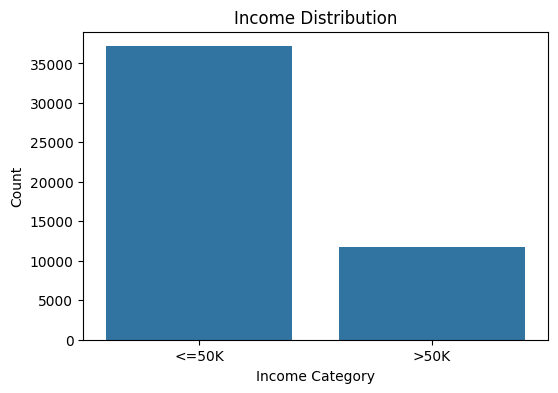

In [ ]:
y_series = y.iloc[:, 0]

y_clean = y_series.str.strip().str.replace(".", "", regex=False)

y_clean.name = "Income"

plt.figure(figsize=(6,4))
sns.countplot(x=y_clean)
plt.title("Income Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()


In [ ]:

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8331456648582249
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7414
           1       0.70      0.54      0.61      2355

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weighted avg       0.82      0.83      0.83      9769



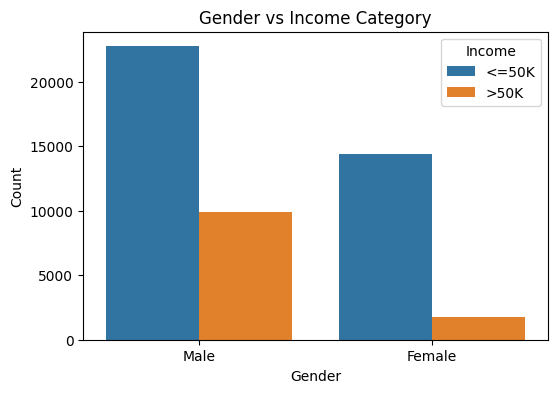

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=X["sex"], hue=y_clean)
plt.title("Gender vs Income Category")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.8318149247620023
              precision    recall  f1-score   support

           0       0.86      0.94      0.89      7414
           1       0.72      0.50      0.59      2355

    accuracy                           0.83      9769
   macro avg       0.79      0.72      0.74      9769
weighted avg       0.82      0.83      0.82      9769



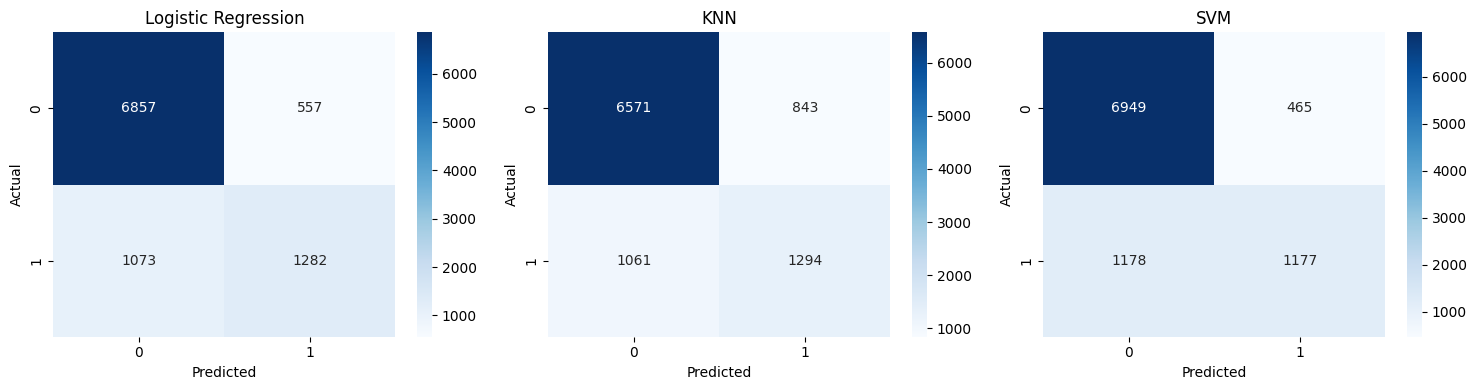

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_knn = confusion_matrix(y_test, knn_pred)
cm_svm = confusion_matrix(y_test, svm_pred)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("KNN")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title("SVM")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate metrics
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)

accuracy_knn = accuracy_score(y_test, knn_pred)
precision_knn = precision_score(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)

accuracy_svm = accuracy_score(y_test, svm_pred)
precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "SVM"],
    "Accuracy": [accuracy_log, accuracy_knn, accuracy_svm],
    "Precision": [precision_log, precision_knn, precision_svm],
    "Recall": [recall_log, recall_knn, recall_svm]
})


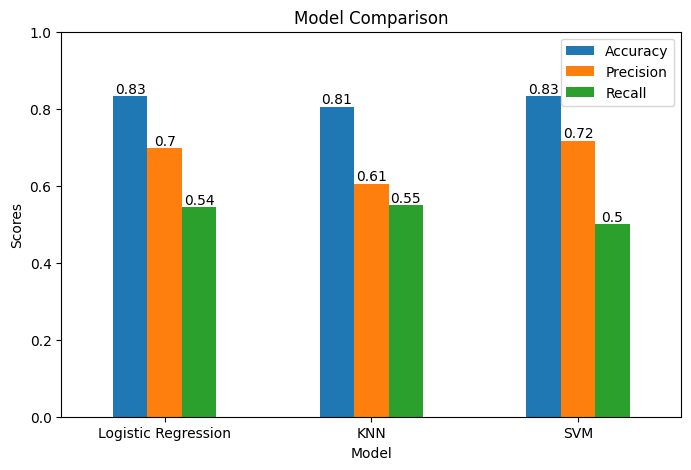

In [ ]:
import matplotlib.pyplot as plt

ax = results_df.plot(x="Model", kind="bar", figsize=(8,5))

plt.title("Model Comparison")
plt.ylabel("Scores")
plt.ylim(0, 1)
plt.xticks(rotation=0)

for bar in ax.patches:
    value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,   
        value,                            
        round(value, 2),                   
        ha='center', va='bottom'           
    )

plt.show()
